First 5 rows of the synthetic production data:
   Month  Production_Rate
0      1      1024.835708
1      2       988.928787
2      3      1024.085720
3      4      1063.729293
4      5       971.763785


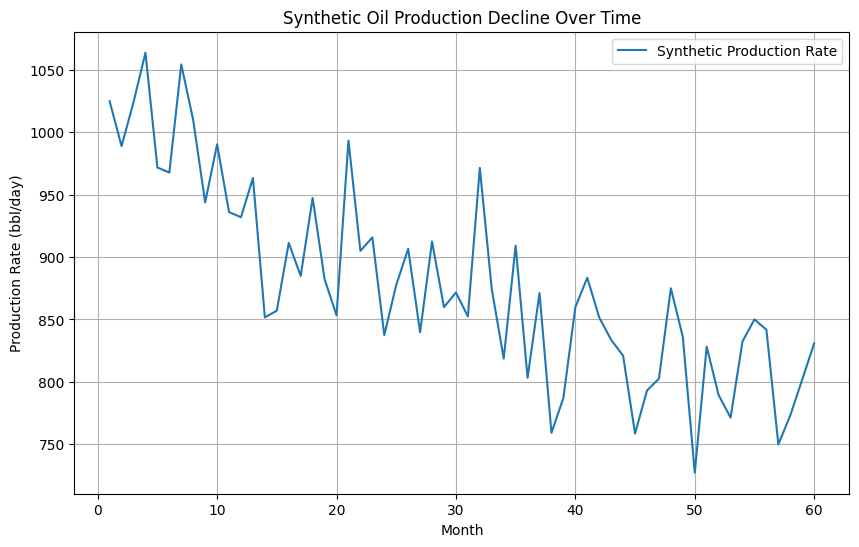

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- Parameters for Synthetic Data ---
initial_production_rate = 1000 # bbl/day
decline_rate = 0.05 # 5% per month (adjust for daily/monthly data as needed)
time_points = 60 # Number of months (e.g., 5 years of data)
noise_level = 50 # To add some realism to the data

# --- Generate Time Series (e.g., months) ---
time = np.arange(1, time_points + 1) # Months 1 to 60

# --- Generate Production Rate with Exponential Decline and Noise ---
# Q(t) = Q_i * exp(-d*t)
production_rate_ideal = initial_production_rate * np.exp(-decline_rate * (time - 1) / 12) # Divide by 12 for annual decline applied monthly
# Add some random noise
np.random.seed(42) # for reproducibility
production_rate_noisy = production_rate_ideal + np.random.normal(0, noise_level, time_points)

# Ensure no negative production rates
production_rate_noisy[production_rate_noisy < 0] = 0

# --- Create a Pandas DataFrame ---
df = pd.DataFrame({
    'Month': time,
    'Production_Rate': production_rate_noisy
})

print("First 5 rows of the synthetic production data:")
print(df.head())

# --- Visualize the Synthetic Data ---
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Production_Rate'], label='Synthetic Production Rate')
plt.title('Synthetic Oil Production Decline Over Time')
plt.xlabel('Month')
plt.ylabel('Production Rate (bbl/day)')
plt.grid(True)
plt.legend()
plt.show()

In [2]:
# --- Basic Data Information ---
print("\nDataFrame Info:")
df.info()

# --- Descriptive Statistics ---
print("\nDescriptive Statistics:")
print(df.describe())

# --- Check for Missing Values ---
print("\nMissing Values:")
print(df.isnull().sum())

# You might add other plots here like a histogram if needed.
# plt.hist(df['Production_Rate'], bins=20)
# plt.title('Distribution of Production Rates')
# plt.xlabel('Production Rate')
# plt.ylabel('Frequency')
# plt.show()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            60 non-null     int64  
 1   Production_Rate  60 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB

Descriptive Statistics:
           Month  Production_Rate
count  60.000000        60.000000
mean   30.500000       878.908740
std    17.464249        79.749159
min     1.000000       727.174464
25%    15.750000       830.157496
50%    30.500000       865.505154
75%    45.250000       932.940639
max    60.000000      1063.729293

Missing Values:
Month              0
Production_Rate    0
dtype: int64


In [3]:
# In this simple scenario, 'Month' is our primary feature (X) and 'Production_Rate' is our target (y)
X = df[['Month']] # Features (input to the model)
y = df['Production_Rate'] # Target (what we want to predict)

print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


Features (X) shape: (60, 1)
Target (y) shape: (60,)


In [4]:
# --- Split Data into Training and Testing Sets ---
# For time series, a chronological split is often preferred.
# Use the first 80% of data for training, last 20% for testing
split_point = int(len(df) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

print(f"\nTraining data points: {len(X_train)}")
print(f"Testing data points: {len(X_test)}")

# --- Initialize and Train the Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)

print("\nLinear Regression Model Trained.")
print(f"Model Coefficient (Slope): {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")


Training data points: 48
Testing data points: 12

Linear Regression Model Trained.
Model Coefficient (Slope): -4.31
Model Intercept: 1003.65



Mean Squared Error (MSE) on Test Set: 2955.39
R-squared (R2) Score on Test Set: -1.00


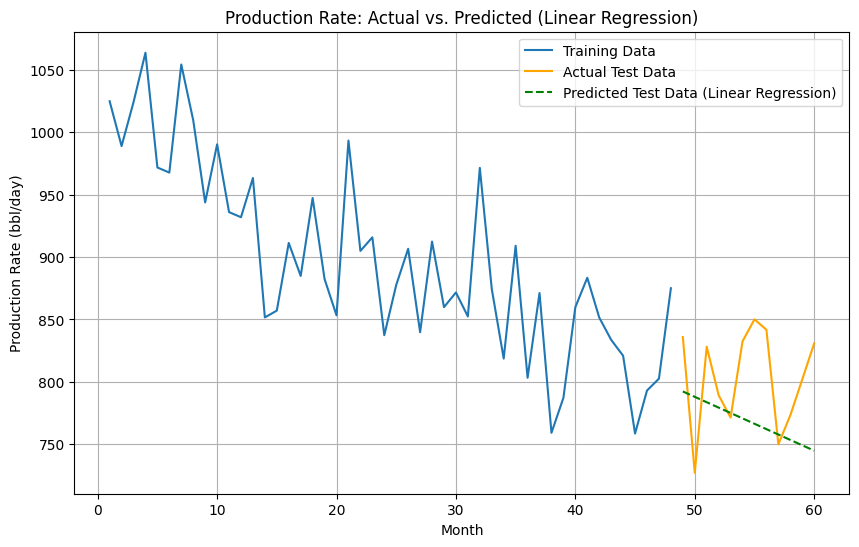

In [5]:
# --- Make Predictions on the Test Set ---
y_pred = model.predict(X_test)

# --- Evaluate Model Performance ---
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE) on Test Set: {mse:.2f}")
print(f"R-squared (R2) Score on Test Set: {r2:.2f}")

# --- Visualize Actual vs. Predicted ---
plt.figure(figsize=(10, 6))
plt.plot(X_train['Month'], y_train, label='Training Data')
plt.plot(X_test['Month'], y_test, label='Actual Test Data', color='orange')
plt.plot(X_test['Month'], y_pred, label='Predicted Test Data (Linear Regression)', linestyle='--', color='green')
plt.title('Production Rate: Actual vs. Predicted (Linear Regression)')
plt.xlabel('Month')
plt.ylabel('Production Rate (bbl/day)')
plt.grid(True)
plt.legend()
plt.show()

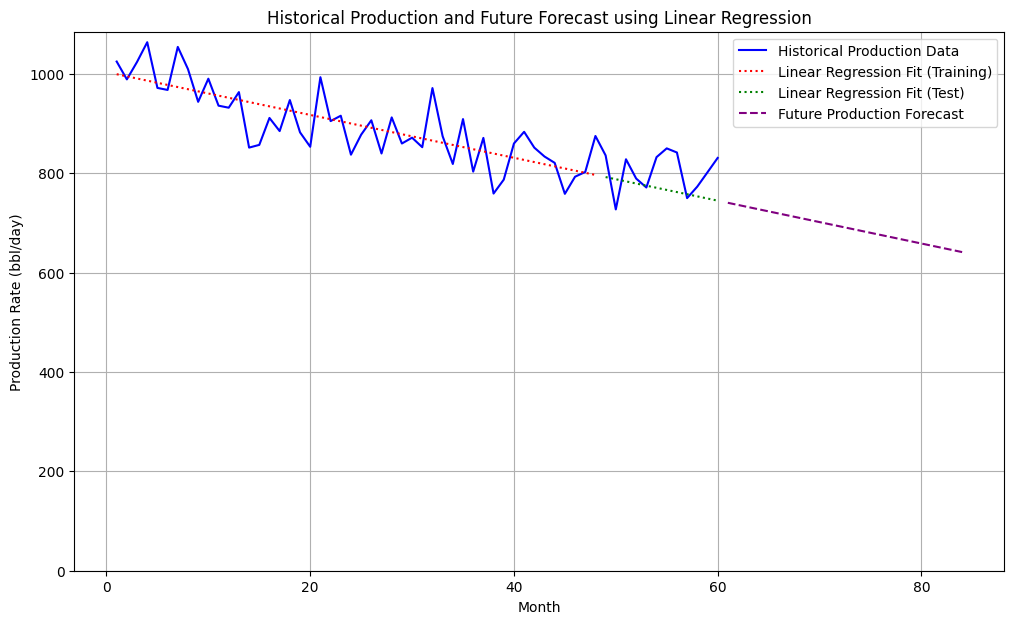

In [6]:
# --- Define Future Time Points for Forecasting ---
future_months = np.arange(time_points + 1, time_points + 25) # Forecast for next 24 months (2 years)
X_future = pd.DataFrame({'Month': future_months})

# --- Make Future Predictions ---
y_forecast = model.predict(X_future)

# Ensure forecast doesn't go negative if using simple linear regression for long periods
y_forecast[y_forecast < 0] = 0

# --- Combine all data for a comprehensive plot ---
plt.figure(figsize=(12, 7))
plt.plot(df['Month'], df['Production_Rate'], label='Historical Production Data', color='blue')
plt.plot(X_train['Month'], model.predict(X_train), label='Linear Regression Fit (Training)', color='red', linestyle=':')
plt.plot(X_test['Month'], y_pred, label='Linear Regression Fit (Test)', color='green', linestyle=':')
plt.plot(X_future['Month'], y_forecast, label='Future Production Forecast', color='purple', linestyle='--')

plt.title('Historical Production and Future Forecast using Linear Regression')
plt.xlabel('Month')
plt.ylabel('Production Rate (bbl/day)')
plt.grid(True)
plt.legend()
plt.ylim(bottom=0) # Ensure y-axis starts from 0
plt.show()